In [1]:
import pandas as pd
import numpy as np
import pymc3 as pm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from xgboost.sklearn import XGBClassifier 
from sklearn import metrics
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn import datasets, svm

%matplotlib inline

Couldn't import dot_parser, loading of dot files will not be possible.


/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data = pd.read_csv('../Capstone/data/ANES_2016_pilot.csv')
data.head()

,vote,age,party_id
0,clinton,56,democrat
1,trump,65,republican
2,clinton,80,democrat
3,trump,38,republican
4,trump,60,republican


In [3]:
data['vote'].value_counts()

clinton         215
trump           158
someone_else     48
Name: vote, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
vote        421 non-null object
age         421 non-null int64
party_id    421 non-null object
dtypes: int64(1), object(2)
memory usage: 9.9+ KB


In [5]:
data['party_id'].value_counts()

democrat       186
independent    138
republican      97
Name: party_id, dtype: int64

In [6]:
data['age'].value_counts()

62    19
56    16
55    12
38    11
57    11
60    11
52    10
67    10
35    10
28    10
63    10
64    10
39     9
43     9
30     9
42     8
59     8
65     8
54     8
34     8
20     8
27     7
49     7
22     7
21     7
24     7
44     7
29     7
32     7
31     7
      ..
71     6
37     5
41     5
58     5
46     5
48     5
78     5
68     5
80     4
23     4
70     4
51     4
53     4
77     3
76     3
75     3
66     3
72     3
50     3
19     2
45     2
73     2
79     2
83     2
47     1
91     1
81     1
82     1
84     1
95     1
Name: age, Length: 68, dtype: int64

In [7]:
data = pd.get_dummies(data, columns=['vote', 'party_id'])

In [8]:
data.head()

,age,vote_clinton,vote_someone_else,vote_trump,party_id_democrat,party_id_independent,party_id_republican
0,56,1,0,0,1,0,0
1,65,0,0,1,0,0,1
2,80,1,0,0,1,0,0
3,38,0,0,1,0,0,1
4,60,0,0,1,0,0,1


## Scaling

In [9]:
y = data['vote_clinton']
X = data[['age', 'party_id_democrat', 'party_id_independent', 'party_id_republican']]

In [10]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head()

/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,age,party_id_democrat,party_id_independent,party_id_republican
0,0.413424,1.124029,-0.698307,-0.547159
1,0.940852,-0.889657,-0.698307,1.827623
2,1.819900,1.124029,-0.698307,-0.547159
3,-0.641433,-0.889657,-0.698307,1.827623
4,0.647836,-0.889657,-0.698307,1.827623


## Train, test, split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled_df, y)

## Logistic Regression

In [12]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Intercept:', logreg.intercept_)
print('Coef(s):', logreg.coef_)

Intercept: [0.20815302]
Coef(s): [[-0.01344239  2.16750907 -0.01156099 -1.94779505]]


/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
print('Logreg predicted probabilities:', logreg.predict(X_train.head(5)))

Logreg predicted probabilities: [0 0 0 1 0]


In [14]:
print('Logreg predicted probabilities:', logreg.predict_proba(X_train.head(5)))

Logreg predicted probabilities: [[0.54149246 0.45850754]
 [0.68957744 0.31042256]
 [0.55480935 0.44519065]
 [0.14712727 0.85287273]
 [0.54815953 0.45184047]]


In [51]:
logreg.fit(X_train, y_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.8027210884353742
0.8031496062992126


/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Random Forest

In [15]:
# instaniate Random Forest
forest = RandomForestClassifier(max_depth=10, n_estimators=5, class_weight="balanced")

In [52]:
# fit Random Forest and check scores
forest.fit(X_train, y_train)
print('\n Random Forest')
print(forest.score(X_test, y_test))



 Random Forest
0.7401574803149606


In [17]:
preds = forest.predict_proba(X_test)[:,1]
print('\n Random Forest ROC AUC')
roc_auc_score(y_test, preds)


 Random Forest ROC AUC


0.7883374689826302

## SMOTE

In [18]:
sm = SMOTE()
X_resample, y_resample = sm.fit_sample(X_train, y_train)
X_scaled_res, y_scaled_res = sm.fit_sample(X_scaled_train, y_scaled_train)

## Support Vector Classifier

In [19]:
svc = SVC(kernel='linear', probability=True)
svc.fit(X_resample, y_resample)
print('\n Support Vector Classifier')
svc.score(X_test, y_test)


 Support Vector Classifier


0.8031496062992126

In [20]:
preds = svc.predict_proba(X_test)[:,1]
print('\n Support Vector Classifier ROC AUC')
roc_auc_score(y_test, preds)


 Support Vector Classifier ROC AUC


0.8343672456575681

## XGBoost

In [21]:
X_resample = pd.DataFrame(X_resample, columns=X_train.columns)
y_resample = pd.DataFrame(y_resample)

In [22]:
model = XGBClassifier()
xgm = model.fit(X_resample, y_resample, eval_metric=roc_auc_score)
print('\n XGBoost')
xgm.score(X_test, y_test)


 XGBoost


/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7637795275590551

In [23]:
preds = xgm.predict_proba(X_test)[:,1]
print('\n XGBoost ROC AUC')
roc_auc_score(y_test, preds)


 XGBoost ROC AUC


0.8260545905707196

In [24]:
X_scaled_res = pd.DataFrame(X_scaled_res, columns=X_train.columns)
y_scaled_res = pd.DataFrame(y_scaled_res)

In [25]:
model = XGBClassifier()
xgm_scaled = model.fit(X_scaled_res, y_scaled_res, eval_metric=roc_auc_score)
print('\n XGBoost scaled')
xgm_scaled.score(X_scaled_test, y_scaled_test)


 XGBoost scaled


/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7830188679245284

In [26]:
preds = xgm_scaled.predict_proba(X_test)[:,1]
print('\n XGBoost ROC AUC')
roc_auc_score(y_test, preds)


 XGBoost ROC AUC


0.8403225806451613

## AdaBoost

In [27]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
ada.fit(X_resample, y_resample)
print('\n AdaBoost')
ada.score(X_test, y_test)

/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 AdaBoost


0.7795275590551181

In [28]:
def plot_coefficients(classifier, feature_names, top_features=4):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # Plot them thangs. 
    plt.figure(figsize=(15, 5))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(0, 2 * top_features),
        feature_names[top_coefficients],
        rotation=60, ha='right')

In [29]:
sorted(list(zip(*svc.coef_, X_train.columns)))

[(-0.00031309118450995044, 'party_id_republican'),
 (1.0796247607913756e-05, 'age'),
 (0.00014914924018682996, 'party_id_independent'),
 (2.0000522363275746, 'party_id_democrat')]

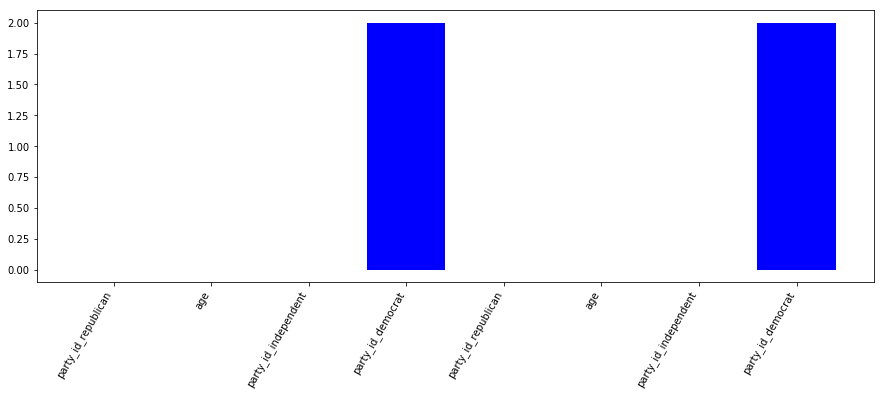

In [30]:
plot_coefficients(svc, X_train.columns)

In [31]:
sorted(list(zip(*logreg.coef_, X_train.columns)))

[(-1.947795053674161, 'party_id_republican'),
 (-0.013442386122077906, 'age'),
 (-0.0115609936151746, 'party_id_independent'),
 (2.167509067562814, 'party_id_democrat')]

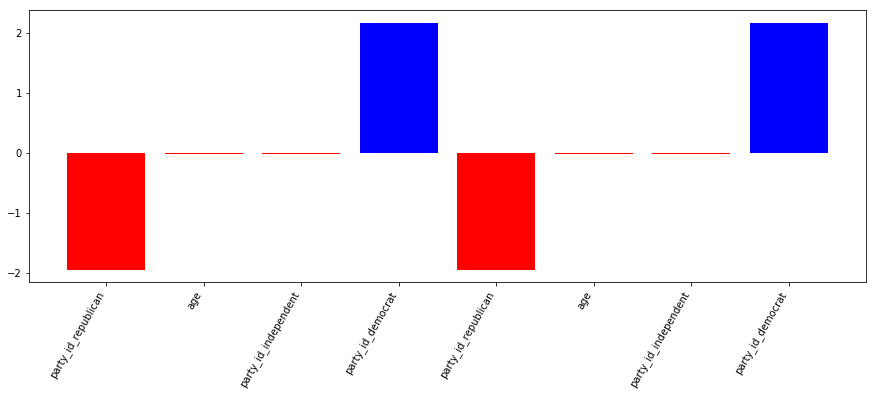

In [49]:
plot_coefficients(logreg, X_train.columns, top_features=4)

In [33]:
def plot_importances(classifier, feature_names, top_features=4, tree_based=False):
    coef = classifier.feature_importances_.ravel()
    top_importances = np.argsort(coef)[-top_features:]
    # create plot
    plt.figure(figsize=(15, 5))
    plt.bar(np.arange(top_features), coef[top_importances], color='blue')
    feature_names = np.array(feature_names)
    plt.xticks(
        np.arange(0, top_features),
        feature_names[top_importances],
        rotation=60, ha='right')

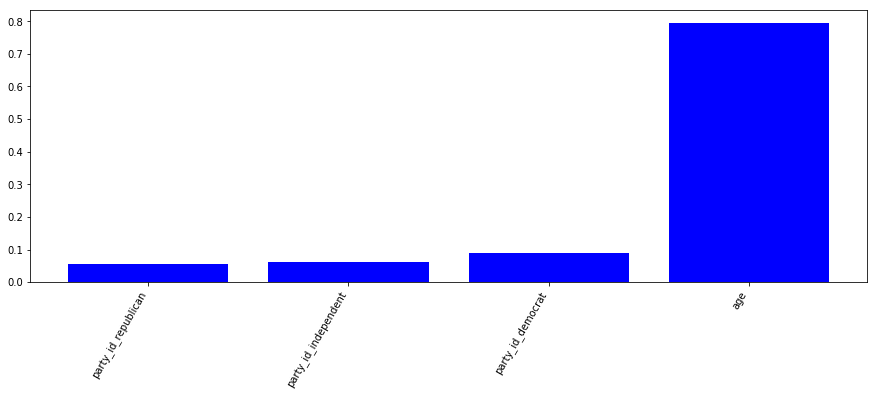

In [34]:
plot_importances(xgm, X_train.columns)

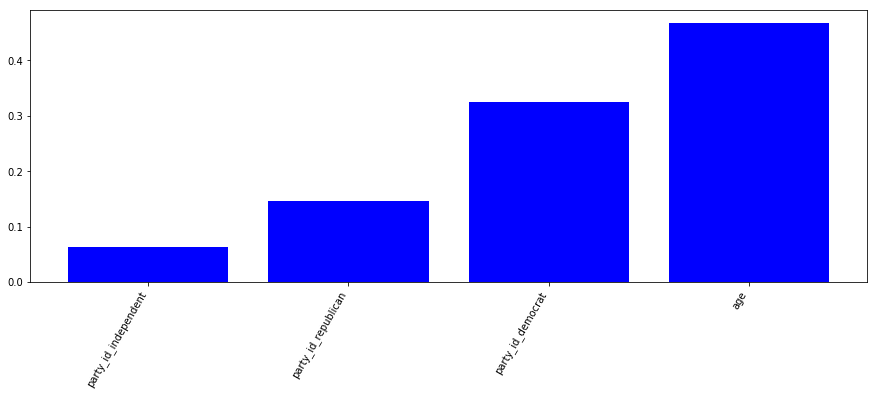

In [35]:
plot_importances(forest, X_train.columns)

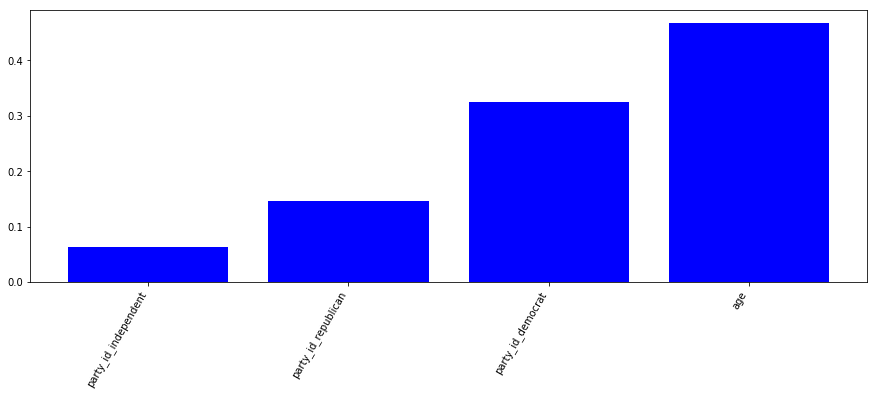

In [36]:
plot_importances(forest, X_train.columns)

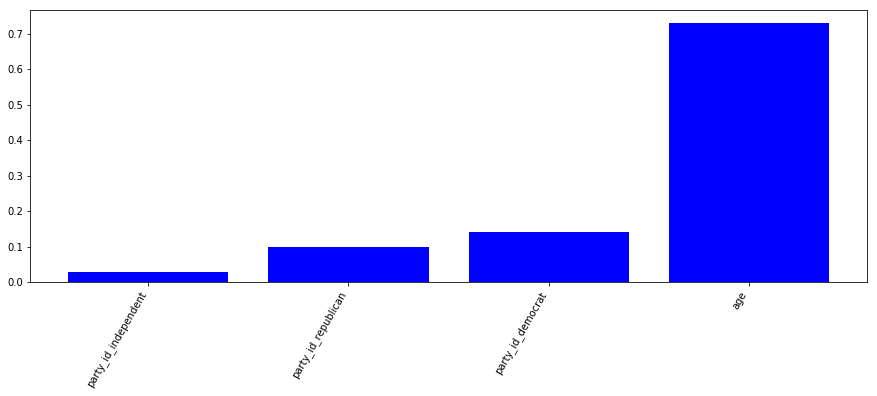

In [37]:
plot_importances(ada, X_train.columns)

In [38]:
data.head()

,age,vote_clinton,vote_someone_else,vote_trump,party_id_democrat,party_id_independent,party_id_republican
0,56,1,0,0,1,0,0
1,65,0,0,1,0,0,1
2,80,1,0,0,1,0,0
3,38,0,0,1,0,0,1
4,60,0,0,1,0,0,1


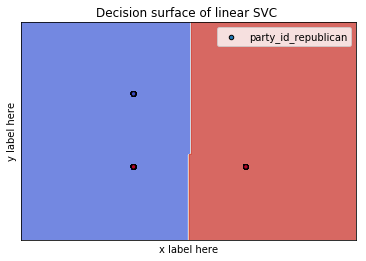

In [39]:



# Select 2 features / variable for the 2D plot that we are going to create.
X = data[['party_id_democrat', 'party_id_republican']]  # we only take the first two features.
y = data['vote_clinton']

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

model = svm.SVC(kernel='linear')
clf = model.fit(X, y)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X['party_id_democrat'], X['party_id_republican']
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()

In [40]:
s = np.random.binomial(421, .51, 1000)

/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Binomial')]

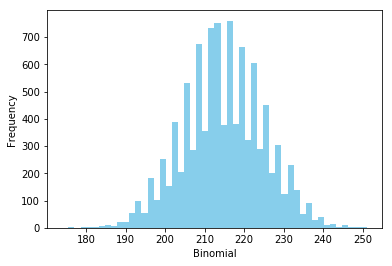

In [41]:
data_binom = binom.rvs(n=421,p=0.51,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')

/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/pauldcyr/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'Frequency'), Text(0.5,0,'Binomial')]

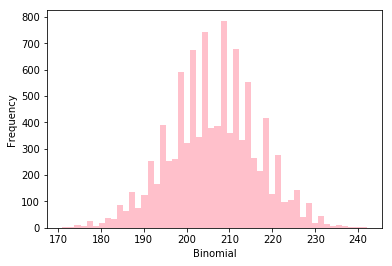

In [42]:
data_binom = binom.rvs(n=421,p=0.49,size=10000)
ax = sns.distplot(data_binom,
                  kde=False,
                  color='pink',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Binomial', ylabel='Frequency')